<a href="https://colab.research.google.com/github/aleksandryessin/Regression_test_task/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/aleksandryessin/Regression_test_task.git
%cd Regression_test_task
! mkdir html

Cloning into 'Regression_test_task'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (120/120), done.
remote: Total 129 (delta 52), reused 33 (delta 4), pack-reused 0
Receiving objects: 100% (129/129), 82.83 MiB | 31.66 MiB/s, done.
Resolving deltas: 100% (52/52), done.
/content/Regression_test_task


![Task](https://github.com/aleksandryessin/Regression_test_task/blob/main/images/test_task.png?raw=true)

# 1 Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.io as pio
from prettytable import PrettyTable
from IPython.display import display
from IPython.display import HTML
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from xgboost import XGBRegressor
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 2 Download the data

In [ ]:
# Reading and displaying given data
df = pd.read_csv('data/data_boiler_1.csv', encoding='utf8').copy()
df.head(7)

,V_DATE,т2267,т2268,т2379,т2380,т2266,т2266/2,т2266/3,т2266/4,т2270,т2270/3,техн104,т2263
0,2020-08-01 00:00:00,77915.974685,77889.115676,602.987379,0.0,379396.596650,1815.736572,24.264420,896.875000,4324.767273,15.2,15.000000,240.600980
1,2020-08-01 00:01:00,78294.718755,78271.682542,600.824843,0.0,338987.432843,1875.114014,24.200001,897.693542,4241.105630,15.2,14.922112,241.615763
2,2020-08-01 00:02:00,78007.556062,77979.785548,602.037766,0.0,328669.419080,1827.952393,24.200001,896.916321,4186.155354,15.2,14.900010,243.259191
3,2020-08-01 00:03:00,78255.374891,78243.088911,603.667469,0.0,366827.243284,1867.092773,24.200001,896.875000,4378.600955,15.2,14.900010,243.322008
4,2020-08-01 00:04:00,78474.798964,78439.012732,602.012647,0.0,422759.212899,1898.480225,24.245493,896.234375,4155.943112,15.2,14.825890,243.848389
5,2020-08-01 00:05:00,78332.742317,78285.913066,602.037291,0.0,406646.017123,1874.793701,24.299999,894.539062,4275.910614,15.2,14.800000,244.410656
6,2020-08-01 00:06:00,78311.518065,78269.373396,603.419222,0.0,367091.480249,1873.461548,24.299999,893.350403,4444.561105,15.2,14.800000,244.248640


In [ ]:
df.tail(7)

,V_DATE,т2267,т2268,т2379,т2380,т2266,т2266/2,т2266/3,т2266/4,т2270,т2270/3,техн104,т2263
262554,2021-01-31 20:53:00,85922.091778,83531.888557,5970.656362,5923.497035,825826.827767,1893.834351,20.100010,868.967590,23434.253457,-1.699997,-2.495597,342.713863
262555,2021-01-31 20:54:00,85945.023030,83380.258346,5988.784950,5935.748489,826008.907763,1896.971558,20.100010,866.320679,23221.027617,-1.699997,-2.500000,342.881555
262556,2021-01-31 20:55:00,85930.648875,78598.570272,6026.030281,6001.688268,825982.568036,1896.046265,20.100010,866.703674,22540.618260,-1.699997,-2.500000,342.606334
262557,2021-01-31 20:56:00,85976.682631,80948.197718,6010.062373,5987.957000,826417.173541,1902.887085,20.100010,866.863220,22555.051800,-1.699997,-2.500000,341.959865
262558,2021-01-31 20:57:00,85929.814710,80387.705109,5952.545727,5926.435257,825907.614717,1895.516846,20.100019,865.954102,22725.313998,-1.699997,-2.500000,341.420256
262559,2021-01-31 20:58:00,85959.341942,82035.529074,5759.869833,5733.626435,826243.225273,1899.486328,20.100031,863.094360,22408.644789,-1.699997,-2.500000,341.231740
262560,2021-01-31 20:59:00,86169.949278,83271.954999,5591.292193,5583.059647,828064.909118,1921.149170,19.974314,863.610291,22595.175967,-1.699997,-2.500000,341.299132


**Data description:**

According to the task here we have one target (т2263) and the 11 features.

**The goal of the task:**


An overall goall is to build a model to predict the amount of vapor.

In [ ]:
# Column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262561 entries, 0 to 262560
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   V_DATE   262561 non-null  object 
 1   т2267    262561 non-null  float64
 2   т2268    262561 non-null  float64
 3   т2379    262561 non-null  float64
 4   т2380    262561 non-null  float64
 5   т2266    262561 non-null  float64
 6   т2266/2  262560 non-null  float64
 7   т2266/3  262560 non-null  float64
 8   т2266/4  262471 non-null  float64
 9   т2270    262561 non-null  float64
 10  т2270/3  262560 non-null  float64
 11  техн104  262561 non-null  float64
 12  т2263    262561 non-null  float64
dtypes: float64(12), object(1)
memory usage: 26.0+ MB



Here is one column with object datatype. It has to be converted into datetime datatype.

# 3 Preprocessing

In [ ]:
# Converting object to datetime
df['V_DATE'] = pd.to_datetime(df['V_DATE'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262561 entries, 0 to 262560
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   V_DATE   262561 non-null  datetime64[ns]
 1   т2267    262561 non-null  float64       
 2   т2268    262561 non-null  float64       
 3   т2379    262561 non-null  float64       
 4   т2380    262561 non-null  float64       
 5   т2266    262561 non-null  float64       
 6   т2266/2  262560 non-null  float64       
 7   т2266/3  262560 non-null  float64       
 8   т2266/4  262471 non-null  float64       
 9   т2270    262561 non-null  float64       
 10  т2270/3  262560 non-null  float64       
 11  техн104  262561 non-null  float64       
 12  т2263    262561 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 26.0 MB


As we see, there also should be missing values in the data.

## 3.1 Statistics

In [ ]:
# Getting statistics for each column
df.describe()

,т2267,т2268,т2379,т2380,т2266,т2266/2,т2266/3,т2266/4,т2270,т2270/3,техн104,т2263
count,262561.000000,262561.000000,262561.000000,262561.000000,262561.000000,262560.000000,262560.000000,262471.000000,262561.000000,262560.000000,262561.000000,262561.000000
mean,83591.154340,80622.184510,1783.852993,1692.394200,593871.985529,1491.935978,22.217640,842.812206,12652.127545,7.940601,6.579398,276.805314
std,22046.500093,21247.195478,1826.488445,1864.321757,217557.779293,342.300373,6.529001,118.028293,10478.749616,12.277266,10.869162,60.518095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.299999,-19.899990,0.000000
25%,80194.659433,77688.440981,680.166289,517.467078,415368.179269,1306.530121,18.000000,831.509644,6303.990227,-0.974202,-1.800003,256.178909
50%,88448.965482,85211.598618,1035.901249,932.097076,629825.003945,1554.587952,22.292431,863.610291,9288.205267,7.000000,6.500000,291.755564
75%,95287.489075,92953.318542,2019.885047,1974.804918,796065.587231,1744.246582,26.100010,890.364441,14207.313744,16.299999,15.400010,313.557447
max,114429.764574,112581.652613,12104.647485,12348.965307,874114.619524,2061.833496,68.994217,1091.072510,51582.163581,43.600010,33.900009,369.534504


In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## 3.2 Missing values

In [ ]:
missing_values_table(df=df)

Your selected dataframe has 13 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
т2266/4,90,0.0
т2266/2,1,0.0
т2266/3,1,0.0
т2270/3,1,0.0


They're a few missing values that should be dropped before choosing an appropriate machine learning strategy.

In [ ]:
# Dropping the missing values.
df = df.dropna() 
df.count()

V_DATE     262470
т2267      262470
т2268      262470
т2379      262470
т2380      262470
т2266      262470
т2266/2    262470
т2266/3    262470
т2266/4    262470
т2270      262470
т2270/3    262470
техн104    262470
т2263      262470
dtype: int64

In [ ]:
# Shape of given data
df.shape

(262470, 13)

In [ ]:
# Creating a list with columns
columns = []
for column in df.columns:
    columns.append(column)

# 4 Exploratory Data Analysis


The purpose is to to find anomalies, patterns, trends, or relationships.

## 4.1 Detecting Outliers with Z-score

Outliers are plotted as a point in the boxplot, but other populations will be grouped and displayed as boxes. (p.s. I removed this Box Plots because of memory overload)

Let's use `Z-score` for that purpose:

In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df.loc[:,'т2267':]))
z

array([[0.25741032, 0.12865106, 0.64641292, ..., 0.59097779, 0.77441077,
        0.59815979],
       [0.24023389, 0.11064856, 0.64759673, ..., 0.59097779, 0.76724542,
        0.58139429],
       [0.25325701, 0.1243844 , 0.64693275, ..., 0.59097779, 0.76521209,
        0.55424279],
       ...,
       [0.10602565, 0.0110746 , 2.28203094, ..., 0.78546877, 0.83552105,
        1.06750234],
       [0.10736474, 0.06646727, 2.17655671, ..., 0.78546877, 0.83552105,
        1.06438782],
       [0.116916  , 0.12464993, 2.0842743 , ..., 0.78546877, 0.83552105,
        1.06550122]])

In [ ]:
# Defining the threshold for catching outliers
threshold = 3
np.where(z > 3)

(array([  3143,   3143,   3143, ..., 258998, 258999, 258999]),
 array([0, 1, 5, ..., 3, 2, 3]))

In [ ]:
df_o = df[(z < 3).all(axis=1)]
df_o

,V_DATE,т2267,т2268,т2379,т2380,т2266,т2266/2,т2266/3,т2266/4,т2270,т2270/3,техн104,т2263
0,2020-08-01 00:00:00,77915.974685,77889.115676,602.987379,0.000000,379396.596650,1815.736572,24.264420,896.875000,4324.767273,15.200000,15.000000,240.600980
1,2020-08-01 00:01:00,78294.718755,78271.682542,600.824843,0.000000,338987.432843,1875.114014,24.200001,897.693542,4241.105630,15.200000,14.922112,241.615763
2,2020-08-01 00:02:00,78007.556062,77979.785548,602.037766,0.000000,328669.419080,1827.952393,24.200001,896.916321,4186.155354,15.200000,14.900010,243.259191
3,2020-08-01 00:03:00,78255.374891,78243.088911,603.667469,0.000000,366827.243284,1867.092773,24.200001,896.875000,4378.600955,15.200000,14.900010,243.322008
4,2020-08-01 00:04:00,78474.798964,78439.012732,602.012647,0.000000,422759.212899,1898.480225,24.245493,896.234375,4155.943112,15.200000,14.825890,243.848389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262556,2021-01-31 20:55:00,85930.648875,78598.570272,6026.030281,6001.688268,825982.568036,1896.046265,20.100010,866.703674,22540.618260,-1.699997,-2.500000,342.606334
262557,2021-01-31 20:56:00,85976.682631,80948.197718,6010.062373,5987.957000,826417.173541,1902.887085,20.100010,866.863220,22555.051800,-1.699997,-2.500000,341.959865
262558,2021-01-31 20:57:00,85929.814710,80387.705109,5952.545727,5926.435257,825907.614717,1895.516846,20.100019,865.954102,22725.313998,-1.699997,-2.500000,341.420256
262559,2021-01-31 20:58:00,85959.341942,82035.529074,5759.869833,5733.626435,826243.225273,1899.486328,20.100031,863.094360,22408.644789,-1.699997,-2.500000,341.231740


In [ ]:
a = df_o.shape
b = df.shape
print('There is the next amount of outliers: ', b[0]-a[0])

There is the next amount of outliers:  21331


In that case, let's plot the visualization scenario with and without outliers.

### 4.1.1 Data with outliers

In [ ]:
# Data visualization with outliers
fig = go.Figure()
fig.add_trace(go.Scatter(name='т2267', x=df['V_DATE'], 
                         y=df.loc[:, 'т2267']))
fig.add_trace(go.Scatter(name='т2268', x=df['V_DATE'], 
                         y=df.loc[:, 'т2268']))
fig.add_trace(go.Scatter(name='т2379', x=df['V_DATE'], 
                         y=df.loc[:, 'т2379']))
fig.add_trace(go.Scatter(name='т2380', x=df['V_DATE'], 
                         y=df.loc[:, 'т2380']))
fig.add_trace(go.Scatter(name='т2366', x=df['V_DATE'], 
                         y=df.loc[:, 'т2266']))
fig.add_trace(go.Scatter(name='т2266/2', x=df['V_DATE'],
                         y=df.loc[:, 'т2266/2']))
fig.add_trace(go.Scatter(name='т2266/3', x=df['V_DATE'], 
                         y=df.loc[:, 'т2266/3']))
fig.add_trace(go.Scatter(name='т2266/4', x=df['V_DATE'], 
                         y=df.loc[:, 'т2266/4']))
fig.add_trace(go.Scatter(name='т2270', x=df['V_DATE'], 
                         y=df.loc[:, 'т2270']))
fig.add_trace(go.Scatter(name='т2270/3', x=df['V_DATE'], 
                         y=df.loc[:, 'т2270/3']))
fig.add_trace(go.Scatter(name='техн104', x=df['V_DATE'], 
                         y=df.loc[:, 'техн104']))
fig.add_trace(go.Scatter(name='т2263', x=df['V_DATE'], 
                         y=df.loc[:, 'т2263']))

fig.update_layout(width=1600, height=1200, 
                  title_text="Data visualization with outliers")
# Find it in the html folder
fig.write_html("html/Data_with_outliers.html") 

![Data_with_outliers](https://github.com/aleksandryessin/Regression_test_task/blob/main/images/outliers.png?raw=true)

### 4.1.2 Data without outliers

In [ ]:
# Data visualization without outliers
fig = go.Figure()
fig.add_trace(go.Scatter(name='т2267', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2267']))
fig.add_trace(go.Scatter(name='т2268', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2268']))
fig.add_trace(go.Scatter(name='т2379', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2379']))
fig.add_trace(go.Scatter(name='т2380', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2380']))
fig.add_trace(go.Scatter(name='т2366', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2266']))
fig.add_trace(go.Scatter(name='т2266/2', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2266/2']))
fig.add_trace(go.Scatter(name='т2266/3', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2266/3']))
fig.add_trace(go.Scatter(name='т2266/4', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2266/4']))
fig.add_trace(go.Scatter(name='т2270', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2270']))
fig.add_trace(go.Scatter(name='т2270/3', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2270/3']))
fig.add_trace(go.Scatter(name='техн104', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'техн104']))
fig.add_trace(go.Scatter(name='т2263', x=df_o['V_DATE'], 
                         y=df_o.loc[:, 'т2263']))

fig.update_layout(width=1600, height=1200, 
                  title_text="Data visualization without outliers")
# Find it in the html folder
fig.write_html("html/Data_without_outliers.html") 

![Data_without_outliers](https://github.com/aleksandryessin/Regression_test_task/blob/main/images/without_outliers.png?raw=true)

Here we see considerable differences in data depending on the season. In winter, there is a significant increase in blast furnace gas throughout the station. And in this case, there should be very functional dependencies for the future model. Later we'll define the correlations between values.

Next, we're going to use df_o instead of df, because the outliers have been removed. We can compare the scenario with or without outliers on the figures above.

## 4.2 Checking normal distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f660a6cfe50>,
      dtype=object)

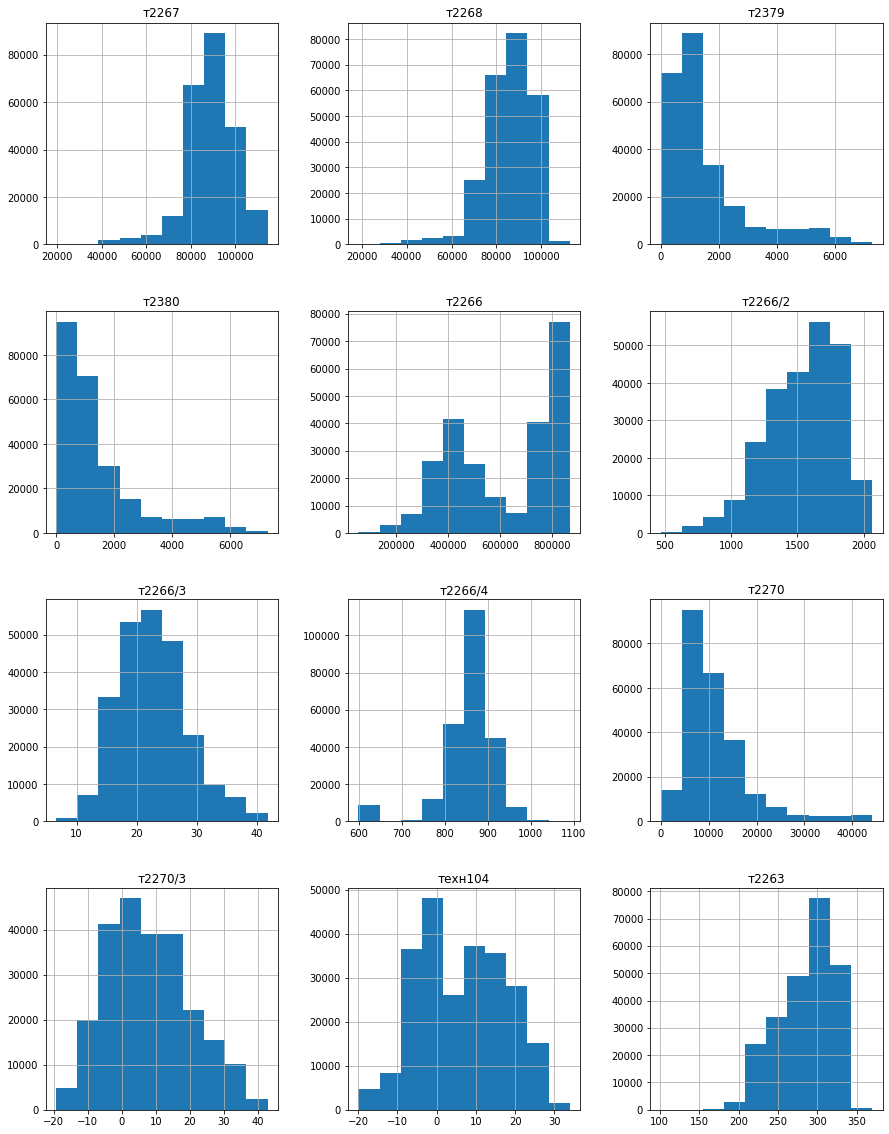

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_o.hist(ax = ax)

As we may see, the data is close to normal distribution.

## 4.3 Finding dependencies

In [ ]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
correlations = df_o.corr() 
correlations

,т2267,т2268,т2379,т2380,т2266,т2266/2,т2266/3,т2266/4,т2270,т2270/3,техн104,т2263
т2267,1.000000,0.959150,-0.249139,-0.238390,0.523585,0.153380,-0.394177,0.038790,-0.300808,-0.490041,-0.487521,0.495149
т2268,0.959150,1.000000,-0.220172,-0.211547,0.538830,0.158081,-0.433678,0.014549,-0.284704,-0.517532,-0.519425,0.485792
т2379,-0.249139,-0.220172,1.000000,0.996081,0.104147,-0.243509,-0.059574,-0.295248,0.845588,-0.185082,-0.218088,0.284406
т2380,-0.238390,-0.211547,0.996081,1.000000,0.108331,-0.252571,-0.061379,-0.296595,0.849607,-0.182288,-0.215900,0.294779
т2266,0.523585,0.538830,0.104147,0.108331,1.000000,-0.022500,-0.633424,0.032034,0.039440,-0.825282,-0.846381,0.523720
т2266/2,0.153380,0.158081,-0.243509,-0.252571,-0.022500,1.000000,0.202402,0.209925,-0.484491,0.096726,0.098974,0.147736
т2266/3,-0.394177,-0.433678,-0.059574,-0.061379,-0.633424,0.202402,1.000000,0.118877,-0.058654,0.676025,0.668049,-0.325211
т2266/4,0.038790,0.014549,-0.295248,-0.296595,0.032034,0.209925,0.118877,1.000000,-0.303732,0.096679,0.109760,0.059638
т2270,-0.300808,-0.284704,0.845588,0.849607,0.039440,-0.484491,-0.058654,-0.303732,1.000000,-0.106232,-0.134191,0.150278
т2270/3,-0.490041,-0.517532,-0.185082,-0.182288,-0.825282,0.096726,0.676025,0.096679,-0.106232,1.000000,0.984508,-0.487687


We may observe that for our Y = т2263 there are correlations almost with all features, excepting т2266/3. But based on physics, I can conclude that we may leave this feature too.

In [ ]:
# Find all correlations with our target and sort them:
correlations_data = df_o.corr()['т2263'].sort_values()
correlations_data

техн104   -0.501131
т2270/3   -0.487687
т2266/3   -0.325211
т2266/4    0.059638
т2266/2    0.147736
т2270      0.150278
т2379      0.284406
т2380      0.294779
т2268      0.485792
т2267      0.495149
т2266      0.523720
т2263      1.000000
Name: т2263, dtype: float64

## 4.4 Stationarity


An essential concept in time series analysis is the concept of stationarity. Stationarity or constancy is the property of a process not to change its characteristics over time. In that case, we should use the Dickey-Fuller test.

The data seems to be stationary (except т2266 - here we have a trend), but let's check it:

In [ ]:
data_2263 = df_o.loc[:, 'т2263'].to_numpy()

In [ ]:
data_2263.shape

(241139,)

**Stationary analysis for several feature and the target**

In [ ]:
result1 = adfuller(data_2263)

In [ ]:
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])
print('Critical Values:')
for key, value in result1[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.251940
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [ ]:
data_2268 = df_o.loc[:, 'т2266'].to_numpy()
data_2268.shape

(241139,)

In [ ]:
result2 = adfuller(data_2268)

In [ ]:
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.564766
p-value: 0.000150
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


As we see, the p-value is close to zero, which is mean that the data is stationary.

Let's check now the т2266:

In [ ]:
data_2266 = df_o.loc[:, 'т2266'].to_numpy()

In [ ]:
data_2266.shape

(241139,)

In [ ]:
result3 = adfuller(data_2266)

In [ ]:
print('ADF Statistic: %f' % result3[0])
print('p-value: %f' % result3[1])
print('Critical Values:')
for key, value in result3[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.564766
p-value: 0.000150
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567



The p-value of т2266 is also almost equal to zero, which means its stationarity.

# 5 Building machine learning models

## 5.1 Train-Test Splitting

In [ ]:
# Features
X = df_o.loc[:, 'т2267':'техн104'] 
X

,т2267,т2268,т2379,т2380,т2266,т2266/2,т2266/3,т2266/4,т2270,т2270/3,техн104
0,77915.974685,77889.115676,602.987379,0.000000,379396.596650,1815.736572,24.264420,896.875000,4324.767273,15.200000,15.000000
1,78294.718755,78271.682542,600.824843,0.000000,338987.432843,1875.114014,24.200001,897.693542,4241.105630,15.200000,14.922112
2,78007.556062,77979.785548,602.037766,0.000000,328669.419080,1827.952393,24.200001,896.916321,4186.155354,15.200000,14.900010
3,78255.374891,78243.088911,603.667469,0.000000,366827.243284,1867.092773,24.200001,896.875000,4378.600955,15.200000,14.900010
4,78474.798964,78439.012732,602.012647,0.000000,422759.212899,1898.480225,24.245493,896.234375,4155.943112,15.200000,14.825890
...,...,...,...,...,...,...,...,...,...,...,...
262556,85930.648875,78598.570272,6026.030281,6001.688268,825982.568036,1896.046265,20.100010,866.703674,22540.618260,-1.699997,-2.500000
262557,85976.682631,80948.197718,6010.062373,5987.957000,826417.173541,1902.887085,20.100010,866.863220,22555.051800,-1.699997,-2.500000
262558,85929.814710,80387.705109,5952.545727,5926.435257,825907.614717,1895.516846,20.100019,865.954102,22725.313998,-1.699997,-2.500000
262559,85959.341942,82035.529074,5759.869833,5733.626435,826243.225273,1899.486328,20.100031,863.094360,22408.644789,-1.699997,-2.500000


In [ ]:
# Target
Y = df_o.loc[:, 'т2263'] 
Y

0         240.600980
1         241.615763
2         243.259191
3         243.322008
4         243.848389
             ...    
262556    342.606334
262557    341.959865
262558    341.420256
262559    341.231740
262560    341.299132
Name: т2263, Length: 241139, dtype: float64

In [ ]:
# Splitting into Train-Test parts 
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = Y[:int(X.shape[0]*0.7)]
y_test = Y[int(X.shape[0]*0.7):]

In [ ]:
# Preparing the metrics
mse = mean_squared_error
mae = mean_absolute_error
mape = mean_absolute_percentage_error

## 5.2 XGBRegressor

This method is perfect for large data.

In [ ]:
xgb = XGBRegressor(random_state=60)

In [ ]:
xgb.fit(X_train, y_train)

[11:23:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=60,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
pred = xgb.predict(X_test)

In [ ]:
# Put the results in the table

th = ['Metrics: ', 'Mean squared error', 'Mean absolute error', 
      'Mean absolute percentage error']
td = ['Results: ', str(round(mse(pred, y_test), 2)), 
      str(round(mae(pred, y_test), 2)), str(round(mape(pred, y_test), 2))]

table_columns = len(th) 
table = PrettyTable(th) 
td_data = td[:]

while td_data:
    table.add_row(td_data[:table_columns])
    td_data = td_data[table_columns:]

print(table)

+-----------+--------------------+---------------------+--------------------------------+
| Metrics:  | Mean squared error | Mean absolute error | Mean absolute percentage error |
+-----------+--------------------+---------------------+--------------------------------+
| Results:  |       366.68       |        15.22        |              5.08              |
+-----------+--------------------+---------------------+--------------------------------+


### 5.2.1 Feature importance

**Feature importance** for XGBoost (it's a very efficient implementation of the stochastic gradient boosting machine learning algorithm):

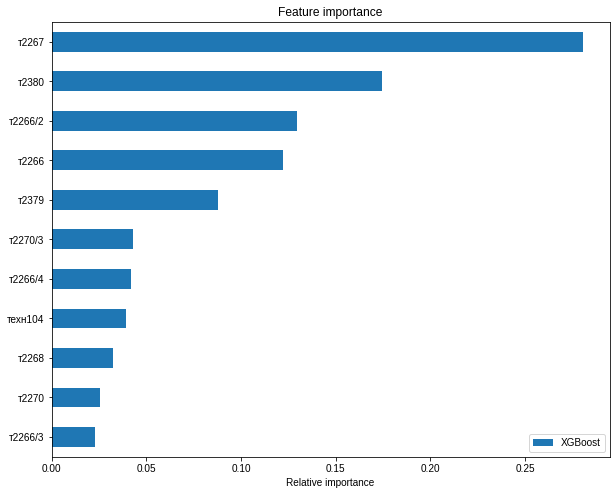

In [ ]:
feature_importances_xgb = xgb.feature_importances_
df_xgb = pd.DataFrame({'XGBoost': feature_importances_xgb}, 
                      index=columns[1:-1])

df_xgb = df_xgb.nsmallest(15, 'XGBoost')
ax = df_xgb.plot.barh(figsize=(10,8))
ax.set_xlabel('Relative importance')
ax.set_title('Feature importance')
ax.legend(loc='lower right')
plt.style.use('seaborn-whitegrid')
plt.show()

There are five of the most important features for XGBRegressor:

1. `т2379` - Природный газ на котел №1 справа - расход
2. `т2266` - Доменный газ на всю станцию - расход
3. `т2266/2` - Доменный газ на всю станцию - давление
4. `т2380` - Природный газ на котел №1 слева - расход
5. `т2267` - Доменный газ на котел №1 справа - расход

 But we also should consider the rest because they're also meaningful.

### 5.2.2 Visualization for XGB

The code below constructs a new data frame and consists of the last 72342 points of the initial dataset, predicted and real values of т2263.

Later, we'll plot the result on the whole dataset with the best model.

In [ ]:
# Creating new DataFrame for visualization:
time = df.loc[(len(df)-(len(pred))):, 'V_DATE']
time_reset = time.reset_index()
time = time_reset['V_DATE']
df_time = pd.DataFrame(time).copy()
df_pred = pd.DataFrame(pred, columns=['Prediction of т2263']).copy()
df_real = y_test.reset_index()['т2263']

In [ ]:
# Adding new information to the dataframe

df_result = pd.concat([df_time, df_pred, df_real], axis=1)
df_result

,V_DATE,Prediction of т2263,т2263
0,2020-12-11 00:49:00,233.689789,219.038798
1,2020-12-11 00:50:00,233.689789,222.553487
2,2020-12-11 00:51:00,228.237778,222.452367
3,2020-12-11 00:52:00,232.265457,225.528156
4,2020-12-11 00:53:00,232.265457,227.972322
...,...,...,...
72337,2021-01-31 20:55:00,297.013855,342.606334
72338,2021-01-31 20:56:00,297.013855,341.959865
72339,2021-01-31 20:57:00,297.013855,341.420256
72340,2021-01-31 20:58:00,297.013855,341.231740


In [ ]:
# Creating a list with columns
cols = []
for column in df_result.columns:
    cols.append(column)

In [ ]:
# Visualizing the data with predictions
fig = go.Figure()
fig.add_trace(go.Scatter(name='т2263', 
                         x=df_result['V_DATE'], 
                         y=df_result.loc[:, 'т2263']))

fig.add_trace(go.Scatter(name='Prediction of т2263', 
                         x=df_result['V_DATE'], 
                         y=df_result.loc[:, 'Prediction of т2263']))

fig.update_layout(width=1600, height=1200, 
                  title_text="XGB result on test part")
# Find it in the html folder
fig.write_html("html/data_with_predictions.html") 

![data_with_predictions](https://github.com/aleksandryessin/Regression_test_task/blob/main/images/XGB.png?raw=true)

## 5.3 Comparing ML methods

In [ ]:
# Function to evaluate models` mse
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mse = mse(y_test, model_pred)
    
    # Return the performance metric
    return model_mse

### 5.3.1 LinearRegression

In [ ]:
lr = LinearRegression()
lr_mse = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MSE = %0.4f' % lr_mse)

Linear Regression Performance on the test set: MSE = 879.8639


### 5.3.2 RandomForestRegressor 

In [ ]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mse = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MSE = %0.4f' % random_forest_mse)

Random Forest Regression Performance on the test set: MSE = 673.7221


### 5.3.3 GradientBoostingRegressor

In [ ]:
gradient_boost = GradientBoostingRegressor(random_state=60)
gradient_boost_mse = fit_and_evaluate(gradient_boost)

print('Gradient Boosted Regression Performance on the test set: MSE = %0.4f' % gradient_boost_mse)

Gradient Boosted Regression Performance on the test set: MSE = 382.0140


### 5.4.3 KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mse = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MSE = %0.4f' % knn_mse)

K-Nearest Neighbors Regression Performance on the test set: MSE = 519.7118


In [ ]:
xgb_mse = round(mse(pred, y_test), 2)

print('XGBRegressor Performance on the test set: MSE = %0.4f' % xgb_mse)

XGBRegressor Performance on the test set: MSE = 366.6800


### 5.4.4 Plotting metrics' results

Text(0.5, 1.0, 'Model Comparison on Test MSE')

<Figure size 432x288 with 0 Axes>

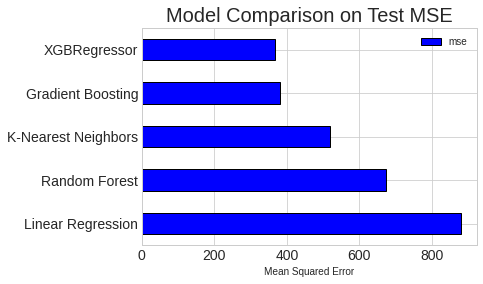

In [ ]:
fig = plt.figure()
plt.style.use('seaborn-whitegrid')

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 
                                           'XGBRegressor',
                                           'Random Forest', 
                                           'Gradient Boosting',
                                           'K-Nearest Neighbors'],
                                 'mse': [lr_mse, xgb_mse, random_forest_mse, 
                                         gradient_boost_mse, knn_mse]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mse', 
                             ascending = False).plot(x = 'model', 
                                                     y = 'mse', 
                                                     kind = 'barh',
                                                     color = 'blue', 
                                                     edgecolor = 'black')

# Plot formatting
plt.ylabel('') 
plt.yticks(size = 14)
plt.xlabel('Mean Squared Error')
plt.xticks(size = 14)
plt.title('Model Comparison on Test MSE', size = 20)

As we see, the Gradient-based model works well. And in this way, the XGBRegressor is the best one.

In [ ]:
models = [lr, xgb, random_forest, gradient_boost, knn]

In [ ]:
# Function to evaluate models` mape
def fit_and_evaluate_mape(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mape = mape(y_test, model_pred)
    
    # Return the performance metric
    return model_mape

In [ ]:
# Creating a new list
mape_models = []
for model in models:
    model_mape = fit_and_evaluate_mape(model)
    # writing the mape to the created list
    mape_models.append(model_mape)

[11:40:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
th = ['Model: ', 'Linear Regression', 'XGBRegressor', 
      'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors']
td = ['Model Performance: ', str(round(mape_models[0], 3)), 
      str(round(mape_models[1], 3)), 
      str(round(mape_models[2], 3)), 
      str(round(mape_models[3], 3)), 
      str(round(mape_models[4], 3))]

table_columns = len(th) 
table = PrettyTable(th) 
td_data = td[:]

while td_data:
    table.add_row(td_data[:table_columns])
    td_data = td_data[table_columns:]

print(table)

+---------------------+-------------------+--------------+---------------+-------------------+---------------------+
|       Model:        | Linear Regression | XGBRegressor | Random Forest | Gradient Boosting | K-Nearest Neighbors |
+---------------------+-------------------+--------------+---------------+-------------------+---------------------+
| Model Performance:  |        7.47       |     5.0      |     6.376     |        5.07       |        5.509        |
+---------------------+-------------------+--------------+---------------+-------------------+---------------------+


Text(0.5, 1.0, 'Model Comparison on Test MAPE')

<Figure size 432x288 with 0 Axes>

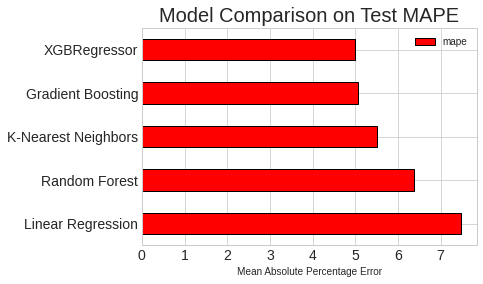

In [ ]:
fig = plt.figure()
plt.style.use('seaborn-whitegrid')

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 
                                           'XGBRegressor',
                                           'Random Forest', 
                                           'Gradient Boosting',
                                            'K-Nearest Neighbors'],
                                 'mape': [mape_models[0], mape_models[1], 
                                          mape_models[2], 
                                          mape_models[3], 
                                          mape_models[4]]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mape', 
                             ascending = False).plot(x = 'model', 
                                                     y = 'mape', 
                                                     kind = 'barh',
                                                     color = 'red', 
                                                     edgecolor = 'black')

# Plot formatting
plt.ylabel('')
plt.yticks(size = 14)
plt.xlabel('Mean Absolute Percentage Error')
plt.xticks(size = 14)
plt.title('Model Comparison on Test MAPE', size = 20)

Let's choose the XGBRegressor as the best one.

## 5.5 Visualizing the final results in the full real dataset

In [ ]:
Y_pred = xgb.predict(df.loc[:, 'т2267':'техн104'])

In [ ]:
# Creating new DataFrame for visualization:
df_time_final = pd.DataFrame(df['V_DATE'])
df_pred_final = pd.DataFrame(Y_pred, columns=['Prediction of т2263'])
df_real_final = pd.DataFrame(df['т2263'])

# Concating in one DataFrame
df_final_result = pd.concat([df_time_final,
                             df_real_final, 
                             df_pred_final], axis=1)

In [ ]:
# Converting into numpy the real column to calculate the metrics
Y_test_final = df_real_final.to_numpy()

In [ ]:
# Creating a list with columns
cols_final = []
for column in df_final_result.columns:
    cols_final.append(column)

**The final result on predicted values (unseen data start from 11 of December 2020 year)**:

In [ ]:
# Visualizing the data with predictions
fig = go.Figure()
# Train part
fig.add_trace(go.Scatter(name='т2263 train part', 
                         x=df_final_result.loc[:190219, 'V_DATE'], 
                         y=df_final_result.loc[:190219, 'т2263']))

fig.add_trace(go.Scatter(name='Prediction of т2263 on train set', 
                         x=df_final_result.loc[:190219, 'V_DATE'], 
                         y=df_final_result.loc[:190219, 
                                               'Prediction of т2263']))
# Test part
fig.add_trace(go.Scatter(name='т2263 test part', 
                         x=df_final_result.loc[190219:, 'V_DATE'], 
                         y=df_final_result.loc[190219:, 'т2263']))

fig.add_trace(go.Scatter(name='Prediction of т2263 on test set', 
                         x=df_final_result.loc[190219:, 'V_DATE'], 
                         y=df_final_result.loc[190219:, 
                                               'Prediction of т2263']))

fig.update_layout(width=1600, height=1200, 
                  title_text="Final prediction result")
fig.write_html("html/final_res.html") # Find it in the html folder

![Final result](https://github.com/aleksandryessin/Regression_test_task/blob/main/images/Final_result.png?raw=true)

Looking at the chart, we may conclude that the model operates well on stationary regimes.

## 5.6 Calculating the metrics for the whole dataset

In [ ]:
# Put the results in the table
Y_pred_final = xgb.predict(X)
Y_test_final = Y
th = ['Metrics: ', 'Mean squared error', 'Mean absolute error', 
      'Mean absolute percentage error']
td = ['Results: ', str(round(mse(Y_pred_final, Y_test_final), 3)), 
      str(round(mae(Y_pred_final, Y_test_final), 3)),
      str(round(mape(Y_pred_final, Y_test_final), 3))]

table_columns = len(th) 
table = PrettyTable(th) 
td_data = td[:]

while td_data:
    table.add_row(td_data[:table_columns])
    td_data = td_data[table_columns:]

print(table)

+-----------+--------------------+---------------------+--------------------------------+
| Metrics:  | Mean squared error | Mean absolute error | Mean absolute percentage error |
+-----------+--------------------+---------------------+--------------------------------+
| Results:  |      291.854       |        12.966       |             4.619              |
+-----------+--------------------+---------------------+--------------------------------+


# 6 Final Resume

Using a simple **XGBRegressor** model the result is good enough:

`~4.6%` for the whole preprocessed dataset;

`~5%` for the test dataset;

The model itself is **good**. I can explain that the **XGBRegressor** implements parallel processing faster than gradient boosting, which is very important. It is also very flexible in terms of optimizing goals and evaluation criteria and is cross-validated. Despite the good model operation, it still has to be improved for commercial purposes. In that case, we can try out more complicated models in the future (e.g., CNN, RNN, or LSTM), or maybe it's enough just to tune the parameters of **XGBRegressor**.